In [11]:
import numpy as np
import pandas as pd

In [12]:
### subset observations (rows)# specify values for each column
import random
import string

emp_dict = {"id": ['EBDA'+str(x) for x in range(1001,1032)],
           "name": [random.choice(string.ascii_letters.lower())*3 for x in range(31)],
           "age": [random.randint(22,45) for _ in range(31)],
           "salary": [random.randint(25000,90000) for _ in range(31)]}

df = pd.DataFrame(data = emp_dict,
                  index= list(range(1,32))) # dict values length
df.head()

,id,name,age,salary
1,EBDA1001,rrr,32,43284
2,EBDA1002,ggg,34,70730
3,EBDA1003,ggg,35,77115
4,EBDA1004,ttt,31,58758
5,EBDA1005,fff,44,42052


### add new column using .at and list comprehension

In [13]:
df['bonus'] = [(df.at[i,'salary'] * 0.05) if i<25 else np.nan for i in range(1,32)]

In [14]:
df

,id,name,age,salary,bonus
1,EBDA1001,rrr,32,43284,2164.20
2,EBDA1002,ggg,34,70730,3536.50
3,EBDA1003,ggg,35,77115,3855.75
4,EBDA1004,ttt,31,58758,2937.90
5,EBDA1005,fff,44,42052,2102.60
6,EBDA1006,uuu,34,43700,2185.00
7,EBDA1007,uuu,22,73736,3686.80
8,EBDA1008,jjj,22,87719,4385.95
9,EBDA1009,ggg,45,26416,1320.80
10,EBDA1010,yyy,30,85631,4281.55


### df.shape

In [15]:
df.shape # tupe of rows and columns

(31, 5)

### len(df)

In [16]:
len(df) # rows

31

### df.nunique()

In [17]:
df.name.nunique() # number of distinct values in a column

13

### df.col.value_counts()

In [18]:
df.age.value_counts() # count of rows with each unique value of a column

23    3
35    3
22    3
32    2
44    2
45    2
30    2
39    2
34    2
41    2
42    1
24    1
33    1
25    1
28    1
37    1
31    1
29    1
Name: age, dtype: int64

### df.describe()

In [19]:
# df.age.describe() # basic descriptive statistics for a specific column
df.describe() # basic descriptive statistics for each column

,age,salary,bonus
count,31.000000,31.000000,24.000000
mean,32.870968,62764.806452,3086.047917
std,7.557521,19035.586282,992.026647
min,22.000000,26416.000000,1320.800000
25%,26.500000,45876.500000,2179.800000
50%,33.000000,70324.000000,3517.050000
75%,39.000000,77305.000000,3761.362500
max,45.000000,87719.000000,4385.950000


### df.describe().T

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31.0,32.870968,7.557521,22.0,26.5,33.00,39.0000,45.00
salary,31.0,62764.806452,19035.586282,26416.0,45876.5,70324.00,77305.0000,87719.00
bonus,24.0,3086.047917,992.026647,1320.8,2179.8,3517.05,3761.3625,4385.95


### summary functions

### df.col.sum()

In [21]:
### df.describe()# df.age.sum() # no meaning
df.bonus.sum() # total bonus for all employees in the company

74065.15

### df.col.count()

In [22]:
df.bonus.count() # counts non null values
# df.name.count() # 30

24

### df.col.mean()

In [23]:
df.salary.mean() # average salary

62764.8064516129

### df.col.min()

In [24]:
df.age.min()

22

### df.col.max()

In [25]:

df.age.max()

45

### df.col.quantile()

In [26]:
# df.age.quantile() # gives 50%
df.age.quantile([0.25, 0.50, 0.75])

0.25    26.5
0.50    33.0
0.75    39.0
Name: age, dtype: float64

### df.col.median()

In [27]:
df.age.median() # middle salary
# ie., 50% emp are getting salary below this value and 50% are getting above this value

33.0

### df.col.std()

In [28]:
df.age.std()

7.557521355064639

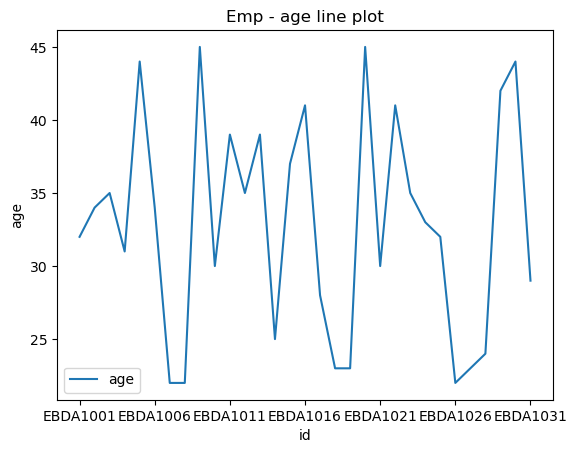

In [29]:
# standard deviation - explanation

import matplotlib.pyplot as plt

# Plotting a line graph
df.plot(x='id', y='age', kind='line')
plt.title('Emp - age line plot')
plt.xlabel('id')
plt.ylabel('age')
plt.show()

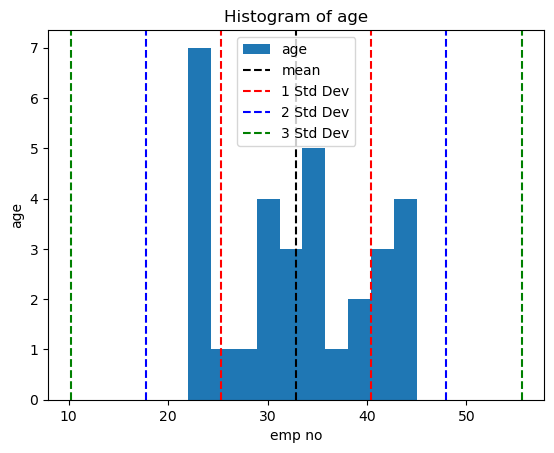

In [30]:
df['age'].plot(kind='hist') # kde
plt.title('Histogram of age')
plt.xlabel('emp no')
plt.ylabel('age')

# Calculating the mean and standard deviation
mean_value = df['age'].mean()
std_value = df['age'].std()

plt.axvline(x=mean_value, color='black', linestyle='--', label='mean')

# Marking the standard deviation ranges on the graph
plt.axvline(x=mean_value - std_value, color='red', linestyle='--', label='1 Std Dev')
plt.axvline(x=mean_value + std_value, color='red', linestyle='--')
plt.axvline(x=mean_value - 2 * std_value, color='blue', linestyle='--', label='2 Std Dev')
plt.axvline(x=mean_value + 2 * std_value, color='blue', linestyle='--')
plt.axvline(x=mean_value - 3 * std_value, color='green', linestyle='--', label='3 Std Dev')
plt.axvline(x=mean_value + 3 * std_value, color='green', linestyle='--')
plt.legend()

plt.show()

### df.col.var()

In [31]:
df.age.var() # square of std

57.116129032258065

### df.col.apply(function)

In [32]:
def oneyear(x):
    return x + 1

In [33]:
df['age'] = df['age'].apply(oneyear)

In [34]:
df.head()

,id,name,age,salary,bonus
1,EBDA1001,rrr,33,43284,2164.20
2,EBDA1002,ggg,35,70730,3536.50
3,EBDA1003,ggg,36,77115,3855.75
4,EBDA1004,ttt,32,58758,2937.90
5,EBDA1005,fff,45,42052,2102.60
